**Cleaning US Census Data**

Exercise from Codecademy

You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it. The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.

First thing need to be done is import all libraries I will use in this exercise.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import glob


It will be easier to inspect this data once we have it in a DataFrame.

*Using glob, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like us_census.*

In [2]:
files = glob.glob('states*.csv')
us_census = []
for filename in files:
  data = pd.read_csv(filename)
  us_census.append(data)
us_census_df = pd.concat(us_census)
print(us_census_df.head())

   Unnamed: 0       State  TotalPop             Hispanic                White  \
0           0     Alabama   4830620  3.7516156462584975%     61.878656462585%   
1           1      Alaska    733375   5.909580838323351%  60.910179640718574%   
2           2     Arizona   6641928  29.565921052631502%  57.120000000000026%   
3           3    Arkansas   2958208   6.215474452554738%   71.13781021897813%   
4           4  California  38421464  37.291874687968054%   40.21578881677474%   

                 Black                Native                Asian  \
0   31.25297619047618%   0.4532312925170065%  1.0502551020408146%   
1  2.8485029940119775%    16.39101796407186%   5.450299401197604%   
2  3.8509868421052658%     4.35506578947368%   2.876578947368419%   
3  18.968759124087573%   0.5229197080291965%  1.1423357664233578%   
4   5.677396405391911%  0.40529206190713685%  13.052234148776776%   

                Pacific              Income            GenderPop  
0  0.03435374149659865%  $43296

*Look at the .columns of the us_census DataFrame.*

In [3]:
print(us_census_df.columns)

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')


*Look at the .dtypes of the us_census DataFrame.*

In [4]:
print(us_census_df.dtypes)

Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object


*Use regex to turn the Income column into a format that is ready for conversion into a numerical type.*

In [5]:
us_census_df.Income = us_census_df['Income'].replace('[\$,]', '', regex=True)
us_census_df.Income = pd.to_numeric(us_census_df.Income)
print(us_census_df.dtypes)

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic       object
White          object
Black          object
Native         object
Asian          object
Pacific        object
Income        float64
GenderPop      object
dtype: object


*Look at the GenderPop column - separate this into two columns, the Men column, and the Women column.*

*Convert both of the columns into numerical datatypes.*

In [6]:
gender_split = us_census_df.GenderPop.str.split('_')
us_census_df['Men'] = gender_split.str.get(0)
us_census_df['Women'] = gender_split.str.get(1)
us_census_df['Men'] = us_census_df.Men.str[0:-1]
us_census_df['Women'] = us_census_df.Women.str[0:-1]
us_census_df.Men = pd.to_numeric(us_census_df.Men)
us_census_df.Women = pd.to_numeric(us_census_df.Women)
print(us_census_df.dtypes)
print(us_census_df.head())

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic       object
White          object
Black          object
Native         object
Asian          object
Pacific        object
Income        float64
GenderPop      object
Men             int64
Women         float64
dtype: object
   Unnamed: 0       State  TotalPop             Hispanic                White  \
0           0     Alabama   4830620  3.7516156462584975%     61.878656462585%   
1           1      Alaska    733375   5.909580838323351%  60.910179640718574%   
2           2     Arizona   6641928  29.565921052631502%  57.120000000000026%   
3           3    Arkansas   2958208   6.215474452554738%   71.13781021897813%   
4           4  California  38421464  37.291874687968054%   40.21578881677474%   

                 Black                Native                Asian  \
0   31.25297619047618%   0.4532312925170065%  1.0502551020408146%   
1  2.8485029940119775%    16.39101796407186%   5.450299401197604%   
2  3.8

*Check the number of NaN value in Women column and fill in by using pandas’ .fillna() function.*

In [7]:
women_nan = us_census_df.Women.isna()
print(women_nan.value_counts())

False    57
True      3
Name: Women, dtype: int64


In [8]:
us_census_df = us_census_df.fillna(value = {'Women': us_census_df.TotalPop - us_census_df.Men})
print(us_census_df.Women.isna().value_counts())

False    60
Name: Women, dtype: int64


*Check for duplicates and if they occur drop those duplicates using the .drop_duplicates() function.*

In [9]:
duplicates = us_census_df.duplicated()
#print(duplicates)
print(duplicates.value_counts())

False    60
dtype: int64


*Make the scatterplot that shows average income in a state vs proportion of women in that state.*

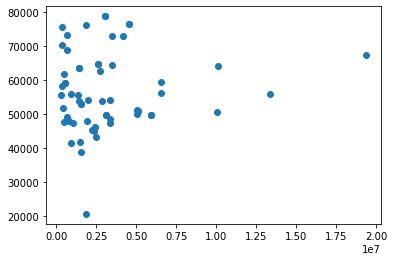

In [10]:
scatter = pyplot.scatter(us_census_df.Women, us_census_df.Income)
pyplot.show()

*Your boss wants you to make a bunch of histograms out of the race data that you have.*

*Remove % sign in all columns: Hispanic, White, Black, Native, Asian, Pacific*

In [11]:
us_census_df.Hispanic = us_census_df['Hispanic'].replace('[\%,]', '', regex=True)
us_census_df.White = us_census_df['White'].replace('[\%,]', '', regex=True)
us_census_df.Black = us_census_df['Black'].replace('[\%,]', '', regex=True)
us_census_df.Native = us_census_df['Native'].replace('[\%,]', '', regex=True)
us_census_df.Asian = us_census_df['Asian'].replace('[\%,]', '', regex=True)
us_census_df.Pacific = us_census_df['Pacific'].replace('[\%,]', '', regex=True)
print(us_census_df.head())

   Unnamed: 0       State  TotalPop            Hispanic               White  \
0           0     Alabama   4830620  3.7516156462584975     61.878656462585   
1           1      Alaska    733375   5.909580838323351  60.910179640718574   
2           2     Arizona   6641928  29.565921052631502  57.120000000000026   
3           3    Arkansas   2958208   6.215474452554738   71.13781021897813   
4           4  California  38421464  37.291874687968054   40.21578881677474   

                Black               Native               Asian  \
0   31.25297619047618   0.4532312925170065  1.0502551020408146   
1  2.8485029940119775    16.39101796407186   5.450299401197604   
2  3.8509868421052658     4.35506578947368   2.876578947368419   
3  18.968759124087573   0.5229197080291965  1.1423357664233578   
4   5.677396405391911  0.40529206190713685  13.052234148776776   

               Pacific        Income            GenderPop       Men  \
0  0.03435374149659865  43296.358603    2341093M_2489527F

*Change the data type from object to numeric in those columns*

In [12]:
us_census_df.Hispanic = pd.to_numeric(us_census_df.Hispanic)
us_census_df.White = pd.to_numeric(us_census_df.White)
us_census_df.Black = pd.to_numeric(us_census_df.Black)
us_census_df.Native = pd.to_numeric(us_census_df.Native)
us_census_df.Asian = pd.to_numeric(us_census_df.Asian)
us_census_df.Pacific = pd.to_numeric(us_census_df.Pacific)
print(us_census_df.dtypes)

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic      float64
White         float64
Black         float64
Native        float64
Asian         float64
Pacific       float64
Income        float64
GenderPop      object
Men             int64
Women         float64
dtype: object


*Check the number of NaN value in those columns and fill in by using pandas’ .fillna() function.*

In [13]:
hispanic = us_census_df.Hispanic.isna()
#print(hispanic)
print(hispanic.value_counts())

white = us_census_df.White.isna()
#print(white)
print(white.value_counts())

black = us_census_df.Black.isna()
#print(black)
print(black.value_counts())

native = us_census_df.Native.isna()
#print(native)
print(native.value_counts())

asian = us_census_df.Asian.isna()
#print(asian)
print(asian.value_counts())

pacific = us_census_df.Pacific.isna()
#print(pacific)
print(pacific.value_counts())

False    60
Name: Hispanic, dtype: int64
False    60
Name: White, dtype: int64
False    60
Name: Black, dtype: int64
False    60
Name: Native, dtype: int64
False    60
Name: Asian, dtype: int64
False    55
True      5
Name: Pacific, dtype: int64


In [14]:
us_census_df = us_census_df.fillna( value = {'Pacific' : us_census_df.Pacific.mean()})
pacific = us_census_df.Pacific.isna()
#print(pacific)
print(pacific.value_counts())

False    60
Name: Pacific, dtype: int64


*Check for duplicates and if they occur drop those duplicates using the .drop_duplicates() function.*

In [15]:
duplicates2 = us_census_df.duplicated()
#print(duplicates2)
print(duplicates2.value_counts())

False    60
dtype: int64


*Plotting the histogram*

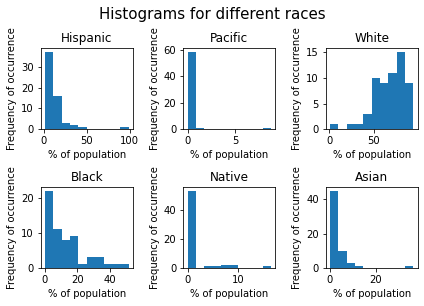

In [16]:
fig, ax = pyplot.subplots(2,3)
ax[0][0].hist(us_census_df['Hispanic'])
ax[0][1].hist(us_census_df['Pacific'])
ax[0][2].hist(us_census_df['White'])
ax[1][0].hist(us_census_df['Black'])
ax[1][1].hist(us_census_df['Native'])
ax[1][2].hist(us_census_df['Asian'])
ax[0][0].set(title='Hispanic', xlabel='% of population', ylabel='Frequency of occurrence')
ax[0][1].set(title='Pacific', xlabel='% of population', ylabel='Frequency of occurrence')
ax[0][2].set(title='White', xlabel='% of population', ylabel='Frequency of occurrence')
ax[1][0].set(title='Black', xlabel='% of population', ylabel='Frequency of occurrence')
ax[1][1].set(title='Native', xlabel='% of population', ylabel='Frequency of occurrence')
ax[1][2].set(title='Asian', xlabel='% of population', ylabel='Frequency of occurrence')
fig.suptitle('Histograms for different races', y=1.05, fontsize=15)
fig.tight_layout()
pyplot.show()